# Imports

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] ='1'
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from skimage import io
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision
from skimage import color
import ast
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimage
import time
from sklearn.model_selection import train_test_split
import copy
%cd /scratch/jic286/MachineLearning/FinalProject


# Data Inspection, Clean-up, and Organization

In [2]:
meta = pd.read_excel('/scratch/jic286/MachineLearning/FinalProject/Training Data/geo-expression-array-immune-cells.xlsx')

In [3]:
meta = meta[meta['title']=='[HG-U133_Plus_2] Affymetrix Human Genome U133 Plus 2.0 Array']

In [179]:
labels = meta[['id', 'cell.type']]
labels['cell.type'].value_counts()

PBMC                            4280
Plasma cells                    3784
B cells                         2689
White blood cells               2349
fibroblast                      1727
endothelial                     1662
Monocytes                       1519
T cells                         1006
GC B cells                       917
NK cells                         693
Macrophage                       688
CD4 T cells                      673
Neutrophils                      646
Dendritic cells                  535
CD8 T cells                      457
Naive CD4 T cells                218
Tregs                            168
Plasmacytoid Dendritic Cells     140
Activated B cells                125
Naive B cells                    101
Myeloid Dendritic cells           81
Memory CD4 T cells                70
Immature Dendritic cells          68
NKT cells                         50
Eosinophils                       45
Naive CD8 T cells                 42
Granulocytes                      39
P

## Simple labeling

In [ ]:
files = os.listdir('/scratch/jic286/MachineLearning/FinalProject/ArrayFiles')

labels['label'] = labels['cell.type'].apply(lambda x: label2code(x))
labels['found'] = labels['id'].apply(lambda x: omit_blanks(x, files))

In [181]:
labels = labels.loc[labels['label'] <8].reset_index(drop=True)
labels = labels.loc[labels['found'] <1].reset_index(drop=True)
print(len(labels))
labels['label'].value_counts()

9399


1    3148
5    1622
0    1271
2    1268
6     760
3     610
7     368
4     352
Name: label, dtype: int64

In [32]:
labels['lengths'].value_counts()
labels['label'].value_counts()
labels['has nans'].value_counts()
labels.to_csv(r'/scratch/jic286/MachineLearning/FinalProject/ArrayLabelsAffymetrix2-Cleaned.csv')

In [29]:
def label2code(label):
    '''
    This is a helper function which takes in a string label and converts it to one of 9 codes
    '''
    label = label.lower()
    if 'fibroblast' in label:
        return 0
    elif 'b c' in label: #b cells 
        return 1
    elif 'endo' in label: #endothelial
        return 2
    elif 'nk' in label: #natural killer
        return 3 ###maybe adjust to exclude NKT cells?
    elif 'neu' in label: #neutrophils
        return 4
    elif (('myel' in label) | ('mono' in label)| ('macro' in label)): #myeloid lineage cells
        return 5
    elif (('cd4' in label)|('th1' in label)|('th2' in label)):
        return 6
    elif 'cd8' in label:
        return 7
    else:
        return 8

    
def omit_blanks(label, files):
    '''
    This is a helper function to get rid of files which do not exist in the directory
    '''

    if(label + ".csv") in files:
        return 0
    else: 
        return 1

def check_nans(file, root_dir):
    series = pd.read_csv(root_dir + file + ".csv", index_col='ID_REF')['VALUE']
    if(np.isnan(series).any()):
        return 1
    else:
        return 0

check_nans('GSM905542', '/scratch/jic286/MachineLearning/FinalProject/ArrayFiles/')

1

In [6]:

def get_lengths(name, rootdir='/scratch/jic286/MachineLearning/FinalProject/ArrayFiles'):
    try:
        data = pd.read_csv(os.path.join(rootdir, name) + ".csv")['VALUE'].values
    except Exception:
        return 0

    if(len(data)<50000):
        print("Length: {}, Name: {}".format(len(data),name))
    return len(data)

In [28]:
#GSM468615', 'GSM549575', 'GSM1368743', 'GSM1027386', 'GSM787275', 'GSM2026735', 'GSM918542', 'GSM410683', 'GSM787170', 'GSM347196
test1 = pd.read_csv(r'/scratch/jic286/MachineLearning/FinalProject/ArrayFiles/GSM468615.csv', index_col = 0)
test2 = pd.read_csv(r'/scratch/jic286/MachineLearning/FinalProject/ArrayFiles/GSM549575.csv', index_col=0)


for data in train_loader:
    if(np.isnan(data[0].numpy()).any()):
        print(x)
        x = data[0]
        #break
test1 =test1.reindex(test2.index)
print(np.isnan(test1['VALUE']).any())



GSM873465 has nans
tensor([[ 181.3300,  484.9680,  149.8060,  ...,  187.5150,  584.5080,
           22.2836],
        [      nan,       nan,       nan,  ...,       nan,       nan,
               nan],
        [1592.9611,  646.5848,  312.0361,  ...,  118.7604,  229.4230,
            9.0877],
        [   7.4193,    6.3048,    6.4032,  ...,    5.9909,    7.6869,
            5.2456],
        [   5.1200,    3.9200,    5.3600,  ...,    3.8600,    4.9200,
            3.5700]])
GSM873446 has nans
tensor([[  8.4781,   6.8777,   7.2771,  ...,   4.9199,   7.2900,   5.6702],
        [  6.4332,   5.8823,   5.5656,  ...,   3.7753,   6.9358,   4.2347],
        [400.7210, 429.9480, 647.7500,  ..., 148.3860, 340.6120,  24.0072],
        [  9.0701,   7.7838,   8.0297,  ...,   6.7584,   7.7610,   6.2405],
        [     nan,      nan,      nan,  ...,      nan,      nan,      nan]])
GSM873437 has nans
tensor([[   7.7791,    6.8741,    6.3210,  ...,    6.8944,    7.3948,
            5.0158],
        [ 364.9

KeyboardInterrupt: 

In [266]:
labels['lengths'].value_counts()

54675    7653
54613     714
54630     415
54627      88
20367      76
43617      64
18391      60
42125      36
22277      35
34853      26
54517      25
32700      22
54621      22
54638      18
44758      18
30573      16
12630      14
35665      12
47854      12
54598      10
43962      10
41334      10
16383       8
0           7
37424       6
54612       6
23474       4
51788       4
54592       2
41551       2
23805       2
13515       1
8756        1
Name: lengths, dtype: int64

# Dataloading

In [134]:
class MicroArrayDataset(Dataset):

    def __init__(self, csv_file, root_dir, index, transform=None,c = 8, ):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
            t (int): threshold of cell type labels
        """
        self.c = c;
        if(isinstance(csv_file, str)):
            self.data_frame = pd.read_csv(csv_file)
            
        else:
            self.data_frame = csv_file
        self.root_dir = root_dir
        self.transform = transform
        self.index = index

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        name = self.data_frame['id'].iloc[idx]
    
        file =name + ".csv"
        data = os.path.join(self.root_dir,file)
        
        
        data = pd.read_csv(data, index_col='ID_REF')
        
        if(len(data) != len(self.index)):
            print("{} does not match index, length is {}".format(name, len(data)))
        data = data.reindex(self.index, fill_value = 0)

        
        data = data['VALUE'].values
        if(np.isnan(data).any()):

            print("{} has nans".format(name))
        
        label = self.data_frame['label'].iloc[idx]
        data = torch.Tensor(data).float()
        sample = (data, label)

        return sample


In [141]:
labels = pd.read_csv(r'/scratch/jic286/MachineLearning/FinalProject/ArrayLabelsAffymetrix2-Cleaned.csv') #previously cleaned data with observed additional metadata
labels = labels[labels['has nans'] ==0]
index = pd.read_csv('/scratch/jic286/MachineLearning/FinalProject/ArrayFiles/' + labels['id'][0] + '.csv', index_col='ID_REF').index
train_data, test_data = train_test_split(labels, test_size=0.10)
root_dir = '/scratch/jic286/MachineLearning/FinalProject/ArrayFiles'
BATCH_SIZE=50
train_loader = DataLoader(MicroArrayDataset(train_data, root_dir, index=index),
                          batch_size=BATCH_SIZE,
                          shuffle=True)
test_loader = DataLoader(MicroArrayDataset(test_data, root_dir, index=index),
                          batch_size=BATCH_SIZE,
                          shuffle=True)
labels['lengths'].value_counts()

54675    7607
Name: lengths, dtype: int64

# Model

In [137]:

    def __init__(self, hidden_size, p=.7):
        super(DeepCellType, self).__init__()
        self.l1 = nn.Linear(hidden_size, 6400)#input
        self.relu1 = nn.LeakyReLU()
        self.drop1 = nn.Dropout(p=p)
        self.drop2 = nn.Dropout(p=p)
        self.drop3 = nn.Dropout(p=p)

        self.norm = nn.LayerNorm(hidden_size)
        self.l2 = nn.Linear(6400, 1280)#
        self.relu2 = nn.LeakyReLU()
        self.l3 = nn.Linear(1280, 8)
        self.relu3 = nn.LeakyReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    def initialize_weights(self, net):
        if(type(net) == nn.Linear):
            nn.init.uniform_(net.weight)

        
    
    def forward(self, x):
        x = self.norm(x)
        out = self.l1(x)
        out = self.relu1(out)
        out = self.drop1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.drop2(out)
        out = self.l3(out)
        out = self.relu3(out)
        out = self.softmax(out)

        return out
    



torch.Size([1, 8])

In [138]:
def countParameters(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    params = sum([np.prod(p.size()) for p in model_parameters])
    return (params)
countParameters(model)


35932718

# Training loop

In [139]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#test = 0
def train(model, train_loader, test_loader, 
          learning_rate=0.005, num_epoch=10, print_every=100):
    # Training steps
    start_time = time.time()
    model.train()
    loss_fn = nn.NLLLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
    last_acc = 0
    acc_dict = []
    loss_dict = []
    


    for epoch in range(num_epoch):
        model.train()
        #print("running")
        for i, (data, labels) in enumerate(train_loader):
            #print(data.shape)
            labels = labels.to(device)
            #data = data.cuda().float()
            #print(device, data.device)
            outputs = model(data.to(device))
            model.zero_grad()
            #print(np.isnan(data.numpy()).any())

            loss = loss_fn(outputs.float(), labels.long())
           # print(outputs, labels, loss)

            
            loss.backward()
            optimizer.step()

             # report performance
            if (i + 1) % print_every == 0:
                print('Train set | epoch: {:3d}/{} | {:6d}/{:6d} batches | Loss: {:6.4f}'.format(
                    epoch + 1, num_epoch, i + 1, len(train_loader), loss.item()))     
#                 print('Epoch: [{0}/{1}], Step: [{2}/{3}], Loss: {4}, Validation Acc:{5}, AUC:{6}'.format(
#                     epoch + 1, EPOCHS, i + 1, len(train_loader), loss.data[0], test_acc, test_auc))
        
    # Evaluate after every epoch
        correct = 0
        total = 0
        model.eval()

        predictions = []
        truths = []

        with torch.no_grad():
            for i, (data, labels) in enumerate(test_loader):
                outputs = model(data.to(device)).squeeze()
#                 import ipdb; ipdb.set_trace()
#                 predicted = ((outputs > 0.5).long()).view(-1)
                pred = outputs.data.max(1)[1]
                predictions += list(pred.cpu().numpy())
                truths += list(labels.cpu().numpy())
                total += labels.size(0)
                correct += (pred == labels.long().to(device)).sum()
                
            acc = ((100.0 * correct) / total)
            acc_dict += [acc]

            if(acc > last_acc):
                print("copying model")
                best_model = copy.deepcopy(model.state_dict())
                last_acc = acc
                
            
            #auc = roc_auc_score(truths, predictions)
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
           # print('Test set | Accuracy: {:6.4f} | AUC: {:4.2f} | time elapse: {:>9}'.format(
           #     acc, auc, elapse))
            print('Test set | Epoch: {} | Accuracy: {:6.4f} | time elapse: {:>9} | Last Loss: {}'.format(epoch+1, 
                acc, elapse, loss.item()))
            loss_dict += [loss.item()]
            if(epoch+1 == num_epoch):
                model.load_state_dict(best_model)
                for i, (data, labels) in enumerate(test_loader):
                    outputs = model(data.to(device)).squeeze()
    #                 import ipdb; ipdb.set_trace()
    #                 predicted = ((outputs > 0.5).long()).view(-1)
                    pred = outputs.data.max(1)[1]
                    predictions += list(pred.cpu().numpy())
                    truths += list(labels.cpu().numpy())
                    total += labels.size(0)
                    correct += (pred == labels.long().to(device)).sum()

    return predictions, truths, best_model, acc_dict, loss_dict ##save this for later

# Training (Note: Actual training done in separate batch job)

In [ ]:

torch.manual_seed(111)

model = DeepCellType(54675).to(device)
predictions, truths, best_model,accs, losses= train(model, train_loader=train_loader, test_loader=test_loader, learning_rate = 0.001, num_epoch=100)


Train set | epoch:   1/100 |    100/   137 batches | Loss: 1.1771
copying model
Test set | Epoch: 1 | Accuracy: 77.0000 | time elapse:  00:07:52 | Last Loss: 0.8680311441421509
Train set | epoch:   2/100 |    100/   137 batches | Loss: 0.9784
copying model
Test set | Epoch: 2 | Accuracy: 87.0000 | time elapse:  00:15:24 | Last Loss: 2.270137071609497
Train set | epoch:   3/100 |    100/   137 batches | Loss: 0.6145
copying model
Test set | Epoch: 3 | Accuracy: 89.0000 | time elapse:  00:22:47 | Last Loss: 0.49322405457496643
Train set | epoch:   4/100 |    100/   137 batches | Loss: 0.3055
Test set | Epoch: 4 | Accuracy: 89.0000 | time elapse:  00:30:10 | Last Loss: 0.42892029881477356
Train set | epoch:   5/100 |    100/   137 batches | Loss: 0.4055
copying model
Test set | Epoch: 5 | Accuracy: 91.0000 | time elapse:  00:37:44 | Last Loss: 0.44966909289360046
Train set | epoch:   6/100 |    100/   137 batches | Loss: 0.3907
copying model
Test set | Epoch: 6 | Accuracy: 93.0000 | time 

# Evaluation code (results below)

### Reloading weights

In [ ]:
model.load_state_dict(torch.load('/scratch/jic286/MachineLearning/FinalProject/full_model_weights_11-30-2019'))

### Plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 8
# Binarize the output
y_score = label_binarize(predictions, classes=np.arange(n_classes))
y_test = label_binarize(truths, classes=np.arange(n_classes))

print(y_test.shape)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
d = pd.read_excel(r'/scratch/jic286/MachineLearning/FinalProject/Cell type lookup table.xlsx', index_col=1)
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='AUC of class {0} (area = {1:0.2f})'
             ''.format((d.loc[i].values[0]), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
plt.figure(0)
plt.plot(np.arange(len(losses)), losses)
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.plot(np.arange(1, len(losses)+1), losses)
plt.xticks(np.arange(1, len(losses)+1))

plt.figure(1)
plt.ylabel('Test Set Accuracy')
plt.xlabel('Epoch')
plt.plot(np.arange(1, len(accs)+1), accs)
plt.xticks(np.arange(1, len(accs)+1))
plt.show()

# Figures from training

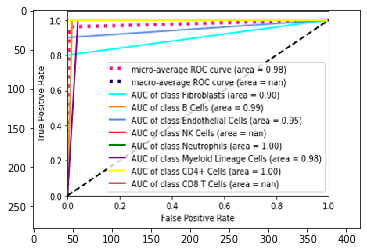

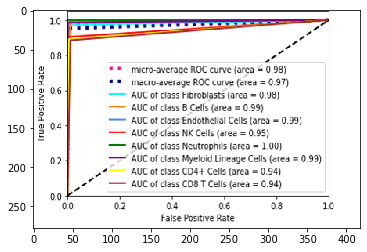

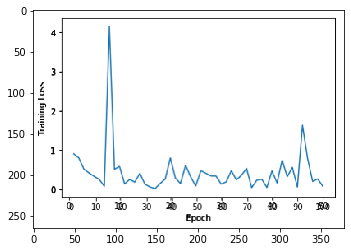

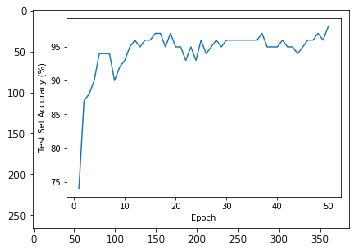

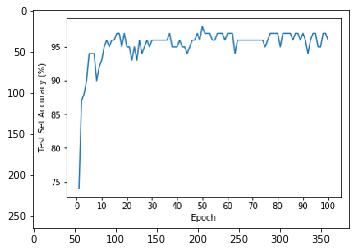

In [13]:
plt.figure(0)
img=mpimage.imread('AUC-sample.png')
imgplot = plt.imshow(img)

plt.figure(1)
img=mpimage.imread('AUC-full.png')
imgplot = plt.imshow(img)

plt.figure(2)
img=mpimage.imread('Loss-100.png')
imgplot = plt.imshow(img)

img=mpimage.imread('Loss-50.png')
imgplot = plt.imshow(img)

plt.figure(3)
img=mpimage.imread('Acc-50.png')
imgplot = plt.imshow(img)

plt.figure(4)
img=mpimage.imread('Acc-100.png')
imgplot = plt.imshow(img)
